In [396]:


from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
from builtins import *

import pylab as pl

import os 
import json 
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf
s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)
#^^Getting an error from the line above

plt.style.use('seaborn-whitegrid')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sum', 'divmod', 'any', 'all', 'e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [343]:
def error(x):
    return np.sqrt(x)

def line(a, x, b=0, error=None):
    np.random.randn(123)
    if error is None:
        return a*x + b
    else: 
        return a*x + b + random.randn(len(x))*error

** 1. **

In [344]:
x = np.linspace(0, 100, 10)
e = error(x)
y = line(1,x,0,e)


Text(0.5,1,'Line with slope 1 and intercept 0, with uncertainties added')

/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


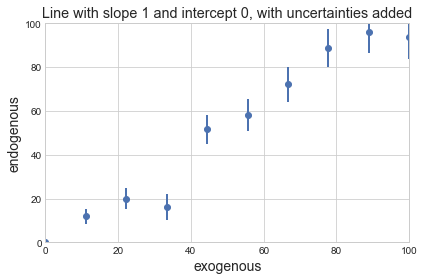

In [346]:
fig=plt.figure(figsize(6,4),tight_layout=True)
ax=plt.axes()

pl.scatter(x,y)

pl.errorbar(x,y,yerr=e, fmt='.')


ax.set_ylim(ymin=0, ymax=100)
ax.set_xlim(xmin=0, xmax=100)
pl.xlabel('exogenous',size=14)
pl.ylabel('endogenous',size=14)
pl.title('Line with slope 1 and intercept 0, with uncertainties added')

** 2. **

In [301]:
xnew = sm.add_constant(x)

#d = {'y' : pd.Series(y, index=None), 'x' : pd.Series(x , index=None)} 
    
     # 'xnew' : pd.Series(xnew, index=None)}

p = pd.DataFrame(d)

print(x)
print(y)
print(xnew)


[  0.          11.11111111  22.22222222  33.33333333  44.44444444
  55.55555556  66.66666667  77.77777778  88.88888889 100.        ]
[  0.           5.02051866  24.66223989  25.09832431  45.29007657
  68.40442191  69.11630573  95.34865523  87.14241992 107.83483586]
[[  1.           0.        ]
 [  1.          11.11111111]
 [  1.          22.22222222]
 [  1.          33.33333333]
 [  1.          44.44444444]
 [  1.          55.55555556]
 [  1.          66.66666667]
 [  1.          77.77777778]
 [  1.          88.88888889]
 [  1.         100.        ]]


** 3. **

In [304]:
#THE WRONG WAY
smfitw = smf.OLS(y, x).fit()
smfitw.summary()

/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     793.9
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           4.34e-10
Time:                        17:03:41   Log-Likelihood:                -33.338
No. Observations:                  10   AIC:                             68.68
Df Residuals:                       9   BIC:                             68.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0745      0.038     28.177      0.000       0.988       1.161
==============================================================================
Omnibus:                        0.664   Durbin-Watson:                   2.704
Prob(Omnibus):                  0.718   Jarque-Bera (JB):                0.516
Skew:                           0.457   Prob(JB):                        0.773
Kurtosis:                       2.365   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [306]:
#THE RIGHT WAY

smfitr = smf.OLS(y, xnew).fit()
smfitr.summary()

/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     237.6
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           3.12e-07
Time:                        17:03:45   Log-Likelihood:                -33.000
No. Observations:                  10   AIC:                             70.00
Df Residuals:                       8   BIC:                             70.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2255      4.311     -0.748      0.476     -13.167       6.716
x1             1.1203      0.073     15.415      0.000       0.953       1.288
==============================================================================
Omnibus:                        0.344   Durbin-Watson:                   2.898
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.449
Skew:                           0.275   Prob(JB):                        0.799
Kurtosis:                       2.119   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

** Discussion **

Skew and kurtosis are smaller in the second model, meaning that the distribution is closer to normal. The second result also has a larger standard error, which makes sense because we know from the kurtosis that the distribution is shorter and wider than the first. 

In the second results printout, you can see a line called "const" above the "x1" line, and the coefficient there tells you the intercept of the model line. 

The second model is better because it shows the true intercept, while the first defaults to intercept 0. 

** 4. **

/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


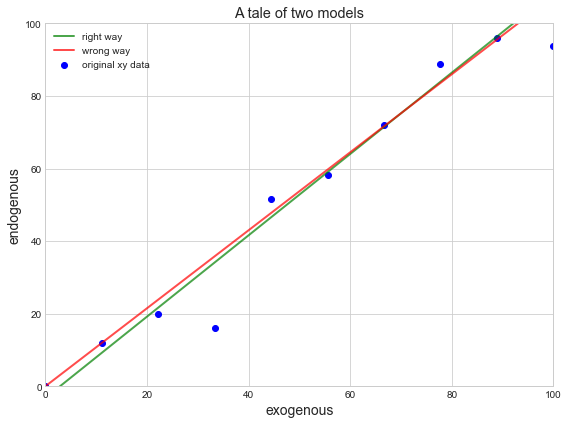

In [376]:
fig=pl.figure(figsize(8,6),tight_layout=True)
ax=pl.axes()


pl.scatter(x,y, label= 'original xy data', c='b')

pl.plot(x,smfitr.fittedvalues, color='g', alpha=.7, label='right way')


pl.plot(x,smfitw.fittedvalues, color='r', alpha=.7, label='wrong way')

ax.set_ylim(ymin=0, ymax=100)
ax.set_xlim(xmin=0, xmax=100)
pl.xlabel('exogenous',size=14)
pl.ylabel('endogenous',size=14)

pl.title('A tale of two models')

pl.legend()

The plot above illustrates that the two models have different intercepts. The wrong way has a y intercept of 0 and the right way has an intercept of -3.2. To the blind eye it does look like the 'right way' model is a better fit for our original xy data. 

** 5. **

In [377]:
np.random.seed(20)

x2 = np.linspace(0, 100, 10)
e2 = error(x)
y2 = line(2,x2,200,e2)


Text(0.5,1,'Line with slope 2 and intercept 200, with uncertainties added')

/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


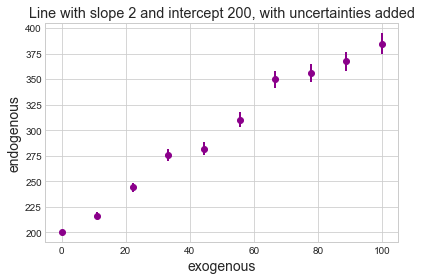

In [386]:
fig=plt.figure(figsize(6,4),tight_layout=True)
ax=plt.axes()

pl.scatter(x2,y2,color='darkmagenta')

pl.errorbar(x2,y2,yerr=e2, fmt='.', color='darkmagenta')

pl.xlabel('exogenous',size=14)
pl.ylabel('endogenous',size=14)
pl.title('Line with slope 2 and intercept 200, with uncertainties added')

You can see that as x gets larger, so too does the error bar. 

** 6. **

In [391]:
xnew2 = sm.add_constant(x2)

In [392]:
#THE WRONG WAY
smfitw2 = smf.OLS(y2, x2).fit()
smfitw2.summary()

/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     61.27
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           2.63e-05
Time:                        19:29:37   Log-Likelihood:                -61.115
No. Observations:                  10   AIC:                             124.2
Df Residuals:                       9   BIC:                             124.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.8007      0.613      7.828      0.000       3.413       6.188
==============================================================================
Omnibus:                        0.650   Durbin-Watson:                   0.091
Prob(Omnibus):                  0.722   Jarque-Bera (JB):                0.554
Skew:                          -0.141   Prob(JB):                        0.758
Kurtosis:                       1.881   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [393]:
smfitr2 = smf.OLS(y2, xnew2).fit()
smfitr2.summary()

/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     437.3
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           2.87e-08
Time:                        19:29:43   Log-Likelihood:                -35.371
No. Observations:                  10   AIC:                             74.74
Df Residuals:                       8   BIC:                             75.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        202.2564      5.465     37.011      0.000     189.655     214.858
x1             1.9265      0.092     20.911      0.000       1.714       2.139
==============================================================================
Omnibus:                        4.304   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.116   Jarque-Bera (JB):                1.751
Skew:                           1.019   Prob(JB):                        0.417
Kurtosis:                       3.229   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


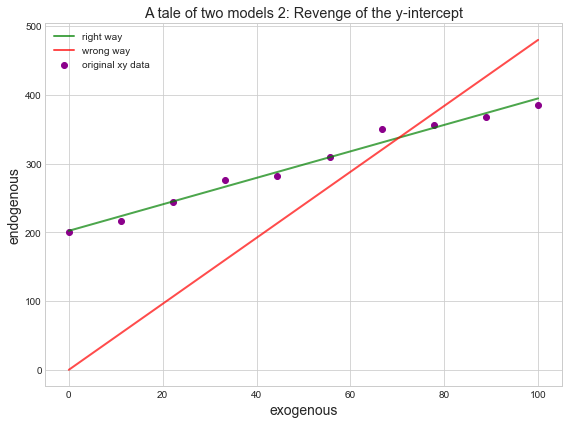

In [395]:
fig=pl.figure(figsize(8,6),tight_layout=True)
ax=pl.axes()


pl.scatter(x2,y2, label= 'original xy data', c='darkmagenta')

pl.plot(x2,smfitr2.fittedvalues, color='g', alpha=.7, label='right way')


pl.plot(x2,smfitw2.fittedvalues, color='r', alpha=.7, label='wrong way')


pl.xlabel('exogenous',size=14)
pl.ylabel('endogenous',size=14)

pl.title('A tale of two models 2: Revenge of the y-intercept')

pl.legend()

With a higher y-intercept it is easier to see the difference between each approach. If you don't run x through sm.add_constant (red line) the y-intercept will be 0, causing the slope of model line to be a bad fit for the data. 

The "right way" line (green) is a much better fit for the original data (shown in magenta). 

** 7. **

In [412]:
w = np.std(e2)

WLS_model = smf.WLS(y2, newx2, weights=1/(w**2)).fit()
WLS_model.summary()

/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.982
Model:                            WLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     437.3
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           2.87e-08
Time:                        19:50:15   Log-Likelihood:                -35.371
No. Observations:                  10   AIC:                             74.74
Df Residuals:                       8   BIC:                             75.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        202.2564      5.465     37.011      0.000     189.655     214.858
x1             1.9265      0.092     20.911      0.000       1.714       2.139
==============================================================================
Omnibus:                        4.304   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.116   Jarque-Bera (JB):                1.751
Skew:                           1.019   Prob(JB):                        0.417
Kurtosis:                       3.229   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


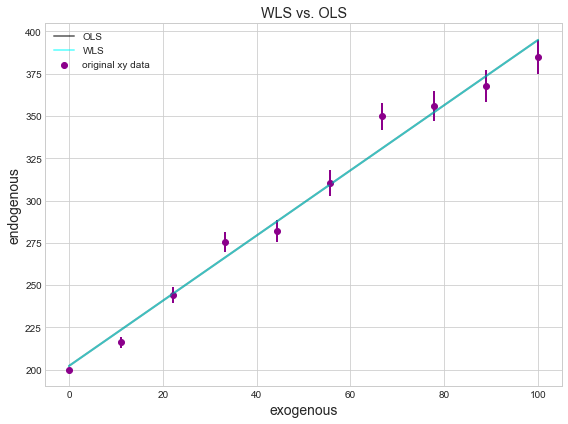

In [414]:
fig=pl.figure(figsize(8,6),tight_layout=True)
ax=pl.axes()


pl.scatter(x2,y2, label= 'original xy data', c='darkmagenta')
pl.errorbar(x2,y2,yerr=e2, fmt='.', color='darkmagenta')

pl.plot(x2,smfitr2.fittedvalues, color='black', alpha=.5, label='OLS')

pl.plot(x2,WLS_model.fittedvalues, color='aqua', alpha=.5, label='WLS')


pl.xlabel('exogenous',size=14)
pl.ylabel('endogenous',size=14)

pl.title('WLS vs. OLS')

pl.legend()

In this graph the lines for OLS and WLS look pretty much the same. I would expect the WLS to maybe have a softer slope because WLS puts less weight on points with high error and the larger x gets the larger the error line gets. 